<a href="https://colab.research.google.com/github/bdbejarc/Instrumentos-Opticos/blob/main/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [2]:
def ploteo_complejo(mat, indicador, escala):
  if(indicador == "I"):
    mat = np.abs(mat)**2
  elif(indicador == "A"):
    mat = abs(mat)
  elif (indicador == "P"):
    mat = np.angle(mat)

  if (escala == 1):
    plt.figure()
    plt.imshow(mat)
    plt.colorbar()
    plt.show()

  else:
    plt.figure()
    plt.imshow(np.log(mat+0.0000001))
    plt.colorbar()
    plt.show()

  return 0

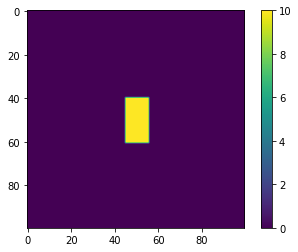

In [3]:
mask = np.zeros((100,100), np.uint8)
cv2.rectangle(mask, (45,40), (55,60),10, -1)
plt.figure()
plt.imshow(mask)
plt.colorbar()
plt.show()


In [4]:
fft_mask_prev = np.fft.fftn(mask)
fft_mask = np.fft.fftshift(fft_mask_prev)

In [5]:
cv2.imwrite("apertura.jpg", np.uint8(mask))

True

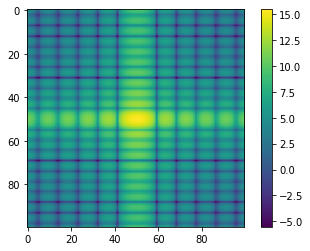

0


In [6]:
a = ploteo_complejo(fft_mask, "I", 0)
print (a)

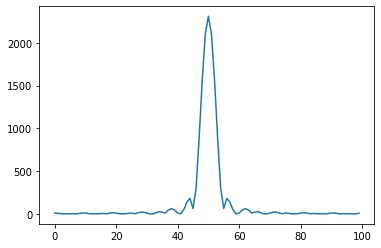

In [7]:
plt.plot(np.abs(np.diag(fft_mask)))

In [8]:
cv2.imwrite("FFTapertura.jpg", np.uint8(np.abs(fft_mask))**2)

True

250


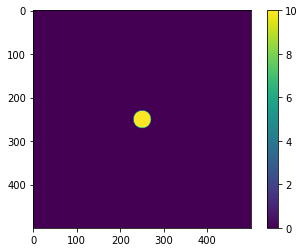

In [9]:
mask2 = np.zeros((500, 500))
coord = int((500,500)[0]/2)
print (coord)
cv2.circle(mask2, (coord, coord), 20, 10, -1)

plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

In [10]:
cv2.imwrite("circulo.jpg", np.uint8(mask2))

True

In [11]:
fft_mask_prev2 = np.fft.fftn(mask2)
fft_mask2 = np.fft.fftshift(fft_mask_prev2)

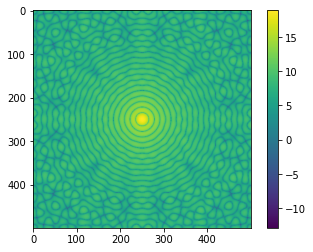

0

In [12]:
ploteo_complejo(fft_mask2, "I", 0)

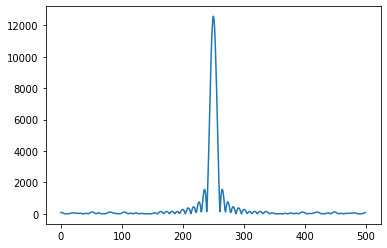

In [13]:
plt.plot(np.abs(np.diag(fft_mask2)))

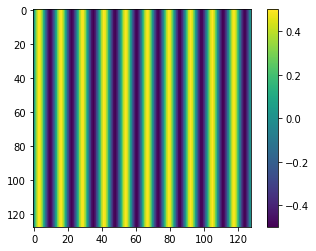

In [14]:
xr = np.linspace(-10,10,128)
yr = np.linspace(-10,10,128)
XR, YR = np.meshgrid(xr, yr)
fr = 0.5
roof = np.sin(2*np.pi*fr*XR)/2

plt.figure()
plt.imshow(roof)
plt.colorbar()
plt.show()

In [15]:
fft_mask_prev3 = np.fft.fftn(roof)
fft_mask3 = np.fft.fftshift(fft_mask_prev3)

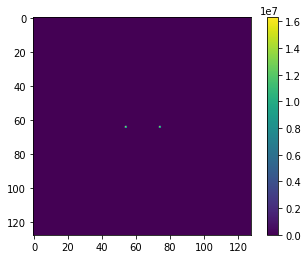

0

In [16]:
ploteo_complejo(fft_mask3, "I", 1)

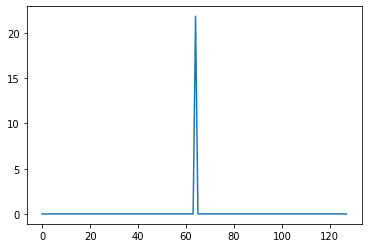

In [17]:
plt.plot(np.abs(fft_mask3[:,100]))

In [18]:
xs = np.linspace(-1,1,100)
ys = np.linspace(-1,1,100)
XS, YS = np.meshgrid(xs, ys)

np.shape(XS)


(100, 100)

In [19]:
print(slit)

NameError: ignored

In [ ]:
fft_mask_prev4 = np.fft.fftn(slit)
fft_mask4 = np.fft.fftshift(fft_mask_prev4)

In [ ]:
class Sheet():
    def __init__(self,extentX, extentY, Nx, Ny):
        self.x = np.linspace(extentX[0],extentX[1],Nx)
        self.y = np.linspace(extentY[0],extentY[1],Ny)
        self.xx,self.yy = np.meshgrid(self.x, self.y)

        self.Nx = int(Nx)
        self.Ny = int(Ny)
        self.f = np.zeros((int(self.Ny), int(self.Nx)))


    def rectangular_slit(self,x0, y0, lx, ly):
        """
        Creates a slit centered at the point (x0, y0) with width lx and height ly
        """
        self.f += np.select( [((self.xx > (x0 - lx/2) ) & (self.xx < (x0 + lx/2) )) & ((self.yy > (y0 - ly/2) ) & (self.yy < (y0 + ly/2) )),  True], [1, 0])

Lx = 1.4
Ly = 0.4
Nx= 2500
Ny= 1500

sheet = Sheet(extentX = [-Lx, Lx] , extentY = [-Ly, Ly], Nx= Nx, Ny= Ny)

#slit separation 
mm = 1e-3
D = 128 * mm

sheet.rectangular_slit(x0 = -D/2, y0 = 0, lx = 22 * mm , ly = 88 * mm)
sheet.rectangular_slit(x0 = +D/2, y0 = 0, lx = 22 * mm , ly = 88 * mm)

# distance from slit to the screen (mm)
z = 5000

# wavelength (mm)
λ = 18.5*1e-7
k = 2*np.pi/λ



fft_c = np.fft.fft2(sheet.f * np.exp(1j * k/(2*z) *(sheet.xx**2 + sheet.yy**2)))
c = np.fft.fftshift(fft_c)

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(2,1,1)  
ax2 = fig.add_subplot(2,1,2,sharex=ax1, yticklabels=[])

abs_c = np.absolute(c)

#screen size mm
Lx_screen = Nx*z*λ/(4*Lx)
Ly_screen = Ny*z*λ/(4*Ly)

x_max = (np.pi/Lx * (Nx//2 - 1))*z*λ/(2*np.pi)
y_max = (np.pi/Ly * (Ny//2 - 1))*z*λ/(2*np.pi)

ax1.imshow(abs_c, extent = [-Lx_screen, Lx_screen, -Ly_screen,Ly_screen], cmap ='gray', interpolation = "bilinear", aspect = 'auto')

ax2.plot(np.linspace(-Lx_screen,Lx_screen, len(abs_c[0])), abs_c[len(abs_c)//2]**2)

ax1.set_ylabel("y (mm)")
ax2.set_xlabel("x (mm)")
ax2.set_ylabel("Probability Density $|\psi|^{2}$")
ax1.set_xlim([-2,2])
ax2.set_xlim([-2,2])
ax1.set_ylim([-1,1])
plt.setp(ax1.get_xticklabels(), visible=False)


plt.show()